In [1]:
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

audio_path = "./sound files/test/greetings.wav"
x, sr = librosa.load(audio_path)
ipd.Audio(audio_path)

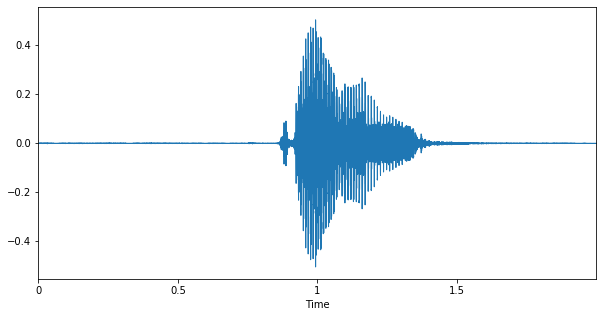

In [2]:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(x, sr)
plt.show()

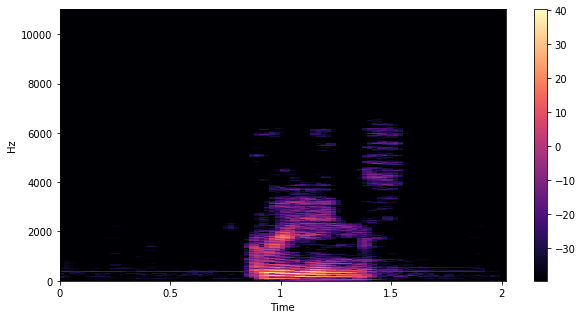

In [3]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

0.09199330998563218


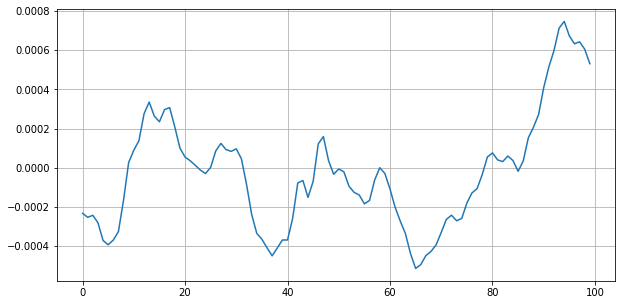

0.11


In [4]:
def zero_crossings(audio_data):

    n0 = 9000
    n1 = 9100
    plt.figure(figsize=(10, 5))
    plt.plot(audio_data[n0:n1])
    plt.grid()
    plt.show()
    return librosa.zero_crossings(audio_data[n0:n1], pad=False)
    
rate = librosa.feature.zero_crossing_rate(x)
print(np.mean(rate))
print(np.mean(zero_crossings(x)))

0.3229691731124853


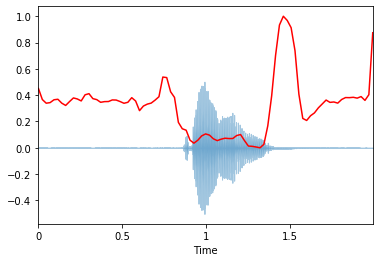

In [5]:
spectral_centroid = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroid.shape
frames = range(len(spectral_centroid))
t = librosa.frames_to_time(frames)


def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroid), color='r')
print(np.mean(normalize(spectral_centroid)))
plt.show()

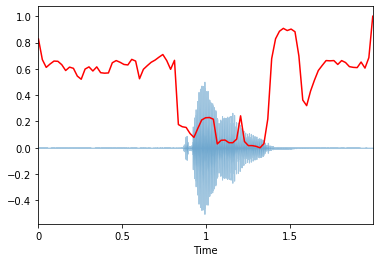

In [6]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.show()

(20, 87)
-513.33636


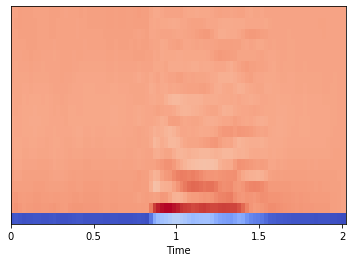

In [7]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
print(np.mean(mfccs[0]))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

In [8]:
import os
import pandas as pd


features = ['Filename', 'Zero-Crossing Rate', 'Spectral Centroid', 'Spectral Rolloff']
for i in range(0, 20):
    features.append(f"MFCC{i}")
features.append('Category')
print(features)
X = []
path = "./sound files/audio classifier data/cats_dogs/all_data"
for filename in os.listdir(path):
    filepath = f"{path}/{filename}"
    category = filename.split('_')[0]
    data = []
    x, sr = librosa.load(filepath)
    data.append(filename)
    data.append(np.mean(librosa.feature.zero_crossing_rate(x)))
    data.append(np.mean(librosa.feature.spectral_centroid(normalize(x), sr=sr)))
    data.append(np.mean(librosa.feature.spectral_rolloff(normalize(x), sr=sr)))
    for i in range(0, 20):
        data.append(np.mean(librosa.feature.mfcc(x, sr=sr)[i]))
    data.append(category)
    X.append(data)

df = pd.DataFrame(X, columns = features)
df

['Filename', 'Zero-Crossing Rate', 'Spectral Centroid', 'Spectral Rolloff', 'MFCC0', 'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'MFCC13', 'MFCC14', 'MFCC15', 'MFCC16', 'MFCC17', 'MFCC18', 'MFCC19', 'Category']


,Filename,Zero-Crossing Rate,Spectral Centroid,Spectral Rolloff,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,MFCC11,MFCC12,MFCC13,MFCC14,MFCC15,MFCC16,MFCC17,MFCC18,MFCC19,Category
0,cat_1.wav,0.077072,171.324742,220.169200,-316.010193,130.950806,-19.625652,37.887032,-7.202529,14.094850,...,-3.216666,1.589842,-9.186468,-0.086110,-5.722125,-0.044563,-5.097544,-2.049219,-0.262751,cat
1,cat_10.wav,0.172155,883.496177,2006.416016,-289.784332,19.932924,-87.986259,26.221779,-32.781151,15.979036,...,-3.433936,2.911933,-17.241531,5.861963,-9.826478,7.310464,11.654932,17.640865,17.503517,cat
2,cat_100.wav,0.110509,818.885277,1657.287598,-194.156082,96.250282,-44.438076,41.626839,-21.592196,19.349100,...,4.363003,27.802237,1.956935,-15.019846,-15.748174,-13.176622,4.247687,1.654975,-18.195438,cat
3,cat_101.wav,0.112239,292.889823,356.969280,-260.638885,90.669746,-41.669640,0.674741,-28.410786,1.020653,...,-12.645851,-3.564109,-12.358790,-3.825287,-5.312829,-3.439565,-2.451178,-2.412098,1.570111,cat
4,cat_102.wav,0.100627,337.097254,438.229190,-280.030945,109.938423,-48.041943,5.455308,-34.924095,6.428154,...,-13.659315,-4.866991,-14.709802,-3.611740,-7.106121,1.311653,-0.599797,4.544626,8.665427,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,dog_barking_95.wav,0.075705,196.715425,303.020020,-371.163971,107.483505,-21.716011,-15.134194,-26.029839,6.324750,...,4.567220,5.432258,-0.339045,12.785054,-5.688891,-5.354804,-4.413776,-2.145662,0.373470,dog
273,dog_barking_96.wav,0.040606,79.994170,150.879622,-390.183716,90.939743,16.376787,-12.093525,-3.607610,11.297049,...,7.827945,11.206436,8.572786,5.987659,-0.409426,-2.411455,0.398209,1.305698,1.146338,dog
274,dog_barking_97.wav,0.063076,167.720671,308.096561,-347.807800,136.422653,-7.555305,-36.290527,-33.055180,-18.254057,...,-3.439909,-12.405958,-10.458591,-2.359511,0.041268,-1.544335,-6.428745,-3.197473,-6.701656,dog
275,dog_barking_98.wav,0.063012,405.446777,716.486862,-203.261673,141.966064,-22.085859,28.579676,-6.158694,8.709475,...,-5.103775,14.341581,1.329294,10.138788,9.931854,6.882198,4.216690,5.131713,0.117233,dog


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = df.drop(['Filename'], axis=1)
y = df['Category']
encoder = LabelEncoder()
y = encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [10]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)


In [11]:
len(y_train)

221

In [12]:
len(y_test)

56

In [13]:
X_train.shape

(221, 23)

In [56]:
import tensorflow as tf

print(tf.__version__)

model = tf.keras.models.Sequential()
layers = tf.keras.layers
model.add(layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='hard_sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print("greetings")

2.1.0-dev20191121
greetings


In [57]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=128)

Train on 221 samples
Epoch 1/30
221/221 [==============================] - 1s 4ms/sample - loss: 0.7227 - accuracy: 0.4027
Epoch 2/30
221/221 [==============================] - 0s 36us/sample - loss: 0.7145 - accuracy: 0.4389
Epoch 3/30
221/221 [==============================] - 0s 95us/sample - loss: 0.7099 - accuracy: 0.4525
Epoch 4/30
221/221 [==============================] - 0s 59us/sample - loss: 0.7062 - accuracy: 0.4525
Epoch 5/30
221/221 [==============================] - 0s 41us/sample - loss: 0.7031 - accuracy: 0.4887
Epoch 6/30
221/221 [==============================] - 0s 68us/sample - loss: 0.7003 - accuracy: 0.5294
Epoch 7/30
221/221 [==============================] - 0s 63us/sample - loss: 0.6978 - accuracy: 0.5430
Epoch 8/30
221/221 [==============================] - 0s 59us/sample - loss: 0.6952 - accuracy: 0.5656
Epoch 9/30
221/221 [==============================] - 0s 41us/sample - loss: 0.6928 - accuracy: 0.5792
Epoch 10/30
221/221 [==============================] 

In [58]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

56/56 [==============================] - 0s 2ms/sample - loss: 0.6361 - accuracy: 0.7500
test_acc:  0.75


In [62]:
predictions = model.predict(X_test)
y_test, predictions


(array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0]), array([[0.6071116 ],
        [0.48885363],
        [0.6318116 ],
        [0.6556049 ],
        [0.49323478],
        [0.53893274],
        [0.4868482 ],
        [0.5516526 ],
        [0.68581533],
        [0.48799682],
        [0.48758462],
        [0.6015439 ],
        [0.4872957 ],
        [0.49488053],
        [0.51008826],
        [0.49285966],
        [0.5133626 ],
        [0.4934494 ],
        [0.49285966],
        [0.59579605],
        [0.50153095],
        [0.6818876 ],
        [0.4899447 ],
        [0.48689026],
        [0.48675588],
        [0.5150465 ],
        [0.4869197 ],
        [0.67780393],
        [0.52278304],
        [0.48724714],
        [0.49459228],
        [0.4975919 ],
        [0.49010682],
        [0.48702994],
        [0.52843297],
        [0.48750144],
        [0.6410

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

cm

array([[22, 11],
       [ 1, 22]], dtype=int64)